In [1]:
import sys
import random
import numpy as np
import pandas as pd
import numpy as np
import json
import matplotlib.pylab as plt
%matplotlib inline
import ipyvolume as ipv

from IPython.display import Image
from scipy import optimize



from tyssue import config, Sheet, SheetGeometry, History, EventManager
from tyssue import SheetGeometry as geom
from tyssue import PlanarGeometry as geom
from tyssue.draw.plt_draw import create_gif
from tyssue.draw.plt_draw import plot_forces
from tyssue.draw import sheet_view
from tyssue.dynamics import effectors, model_factory
from tyssue.dynamics import PlanarModel
from tyssue.dynamics import SheetModel as model
from tyssue.generation import three_faces_sheet
from tyssue.solvers.viscous import EulerSolver
from tyssue.solvers.quasistatic import QSSolver
from tyssue.draw import sheet_view
from tyssue.draw.plt_draw import plot_forces
from tyssue.io import hdf5
import copy

from tyssue.geometry.planar_geometry import PlanarGeometry as geom
from tyssue.solvers.quasistatic import QSSolver
from tyssue.dynamics.planar_vertex_model import PlanarModel as model


from tyssue.stores import load_datasets

from tyssue.topology.sheet_topology import remove_face, cell_division

import warnings
warnings.filterwarnings('ignore')

C++ extension are not available for this version
collision solver could not be imported You may need to install CGAL and re-install tyssue


In [2]:
def length_elasticity_range(cellmap, lower_length_elasticity, higher_length_elasticity):
    for edge in range(len(cellmap.edge_df)):
        newValue = random.randrange(lower_length_elasticity, higher_length_elasticity)/10000
        cellmap.edge_df['length_elasticity'][edge] = newValue         
    return cellmap

In [43]:
def change_specs(cellmap_original, geom_original, model_original, history_original, face_elasticity,
                 prefered_area, lower_length_elasticity, higher_length_elasticity, line_nought, endTime):
    
    #history_original = History(cellmap_original, extra_cols={"edge":["dx", "dy"]})
    
    cellmap_original.face_df["face_elasticity"] = face_elasticity
    cellmap_original.face_df["prefered_area"] = prefered_area
    cellmap_original.edge_df["prefered_length"] = line_nought
    #cellmap_original.edge_df["length_elasticity"] = length_elasticity

    cellmap_original.vert_df["viscosity"] = 1   
    
    cellmap_original = length_elasticity_range(cellmap_original, lower_length_elasticity, higher_length_elasticity)

    solver1 = EulerSolver(cellmap_original, geom_original, model_original, history=history_original, auto_reconnect=True)
    res1 = solver1.solve(tf=endTime, dt=0.05)
    
    cellmap_new = copy.deepcopy(cellmap_original)
    geom_new = copy.deepcopy(geom_original)
    model_new = copy.deepcopy(model_original)
    history_new = copy.deepcopy(history_original)
    
    return [cellmap_new, geom_new, model_new, history_new]
    

In [106]:
## Definition of the sheet
geom_original  = SheetGeometry # This may need to change
#model = PlanarModel # This may need to change
model_original = model_factory([    
    effectors.FaceAreaElasticity,
    effectors.LengthElasticity
    ])

cellmap_original = Sheet.planar_sheet_3d('cellmap', 20, 20, 1, 1) # This may need to change

history_original = History(cellmap_original, extra_cols={"edge":["dx", "dy"]})


cellmap_original.sanitize ( trim_borders=True, order_edges=True )

geom.update_all(cellmap_original)

cellmap_original.update_specs(model_original.specs)



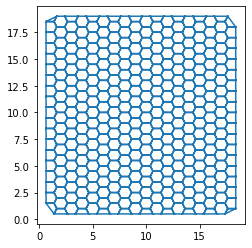

In [76]:
fig, ax = sheet_view(cellmap_original, ['y', 'x'], mode='quick')

## Phase: Homeostasis

In [18]:
[cellmap_H, geom_H, model_H, history_H] = change_specs(cellmap_original, geom_original, model_original, history_original, 
                                                       face_elasticity = 0.05, prefered_area = 0.6, lower_length_elasticity = 100, 
                                                       higher_length_elasticity = 200, line_nought = 0.01 , endTime = 10)


area =
0.8054918213927054
face elasticity =
0.04999999999999998
prefered length =
0.009999999999999998


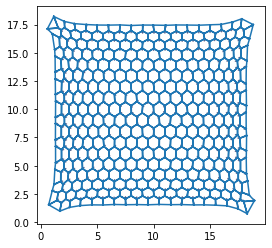

In [19]:
fig, ax = plot_forces(cellmap_H, geom_H, model_H, ['x', 'y'], 1)
print('area =')
print(cellmap_H.face_df["area"].mean())
print('face elasticity =')
print(cellmap_H.face_df["face_elasticity"].mean())
print('prefered length =')
print(cellmap_H.edge_df["prefered_length"].mean())

In [21]:
print(cellmap_H.edge_df["length_elasticity"])

edge
0       0.0171
1       0.0117
2       0.0186
3       0.0102
4       0.0122
         ...  
1971    0.0117
1972    0.0155
1973    0.0108
1974    0.0109
1975    0.0114
Name: length_elasticity, Length: 1976, dtype: float64


In [23]:
[cellmap_H, geom_H, model_H, history_H] = change_specs(cellmap_original, geom_original, model_original, history_original, 
                                                       face_elasticity = 0.05, prefered_area = 0.6, lower_length_elasticity = 100, 
                                                       higher_length_elasticity = 500, line_nought = 0.01 , endTime = 10)


area =
0.7980136899001962
face elasticity =
0.04999999999999998
prefered length =
0.009999999999999998


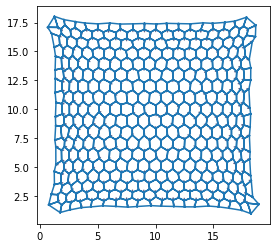

In [24]:
fig, ax = plot_forces(cellmap_H, geom_H, model_H, ['x', 'y'], 1)
print('area =')
print(cellmap_H.face_df["area"].mean())
print('face elasticity =')
print(cellmap_H.face_df["face_elasticity"].mean())
print('prefered length =')
print(cellmap_H.edge_df["prefered_length"].mean())

In [25]:
print(cellmap_H.edge_df["length_elasticity"])

edge
0       0.0245
1       0.0388
2       0.0494
3       0.0160
4       0.0261
         ...  
1971    0.0374
1972    0.0168
1973    0.0251
1974    0.0300
1975    0.0129
Name: length_elasticity, Length: 1976, dtype: float64


In [35]:
[cellmap_H, geom_H, model_H, history_H] = change_specs(cellmap_original, geom_original, model_original, history_original, 
                                                       face_elasticity = 0.05, prefered_area = 0.6, lower_length_elasticity = 100, 
                                                       higher_length_elasticity = 2500, line_nought = 0.01 , endTime = 10)

area =
0.7544120335143722
face elasticity =
0.04999999999999998
prefered length =
0.009999999999999998
edge
0       0.431372
1       0.390075
2       0.615776
3       0.979237
4       0.767569
          ...   
1971    0.460615
1972    0.371222
1973    0.681524
1974    0.912746
1975    0.552138
Name: length, Length: 1976, dtype: float64


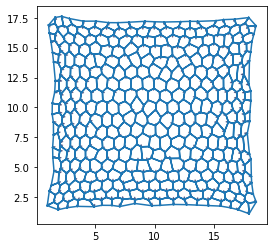

In [36]:
fig, ax = plot_forces(cellmap_H, geom_H, model_H, ['x', 'y'], 1)
print('area =')
print(cellmap_H.face_df["area"].mean())
print('face elasticity =')
print(cellmap_H.face_df["face_elasticity"].mean())
print('prefered length =')
print(cellmap_H.edge_df["prefered_length"].mean())
print(cellmap_H.edge_df["length"])

In [37]:
print(cellmap_H.edge_df["length_elasticity"])

edge
0       0.2351
1       0.1876
2       0.2455
3       0.0275
4       0.1036
         ...  
1971    0.2007
1972    0.0369
1973    0.1458
1974    0.0850
1975    0.1223
Name: length_elasticity, Length: 1976, dtype: float64


In [49]:
[cellmap_H, geom_H, model_H, history_H] = change_specs(cellmap_original, geom_original, model_original, history_original, 
                                                       face_elasticity = 0.05, prefered_area = 0.6, lower_length_elasticity = 100, 
                                                       higher_length_elasticity = 5000, line_nought = 0.01 , endTime = 10)

area =
0.7065757704908358
face elasticity =
0.04999999999999998
prefered length =
0.009999999999999998


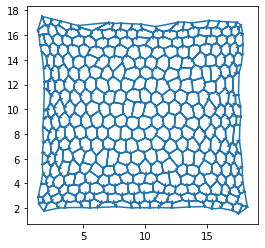

In [50]:
fig, ax = plot_forces(cellmap_H, geom_H, model_H, ['x', 'y'], 1)
print('area =')
print(cellmap_H.face_df["area"].mean())
print('face elasticity =')
print(cellmap_H.face_df["face_elasticity"].mean())
print('prefered length =')
print(cellmap_H.edge_df["prefered_length"].mean())

In [47]:
print(cellmap_H.edge_df["length_elasticity"])

edge
0       0.2343
1       0.3965
2       0.2460
3       0.3448
4       0.4608
         ...  
1971    0.0310
1972    0.4811
1973    0.0331
1974    0.0641
1975    0.0604
Name: length_elasticity, Length: 1976, dtype: float64


In [107]:
[cellmap_H, geom_H, model_H, history_H] = change_specs(cellmap_original, geom_original, model_original, history_original, 
                                                       face_elasticity = 0.05, prefered_area = 0.6, lower_length_elasticity = 100, 
                                                       higher_length_elasticity = 10000, line_nought = 0.01 , endTime = 10)

area =
0.630629783067298
face elasticity =
0.04999999999999998
prefered length =
0.009999999999999998


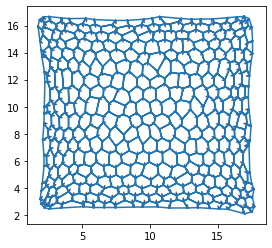

In [108]:
fig, ax = plot_forces(cellmap_H, geom_H, model_H, ['x', 'y'], 1)
print('area =')
print(cellmap_H.face_df["area"].mean())
print('face elasticity =')
print(cellmap_H.face_df["face_elasticity"].mean())
print('prefered length =')
print(cellmap_H.edge_df["prefered_length"].mean())

In [109]:
print(cellmap_H.edge_df["length_elasticity"])

edge
0       0.0341
1       0.7671
2       0.4334
3       0.8544
4       0.8352
         ...  
1971    0.7197
1972    0.6345
1973    0.6668
1974    0.5844
1975    0.1399
Name: length_elasticity, Length: 1976, dtype: float64


In [92]:
[cellmap_H, geom_H, model_H, history_H] = change_specs(cellmap_original, geom_original, model_original, history_original, 
                                                       face_elasticity = 0.05, prefered_area = 0.6, lower_length_elasticity = 100, 
                                                       higher_length_elasticity = 50000, line_nought = 0.01 , endTime = 10)

area =
0.32162234106673976
face elasticity =
0.04999999999999998
prefered length =
0.009999999999999998


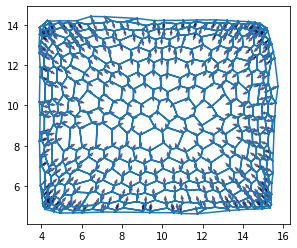

In [93]:
fig, ax = plot_forces(cellmap_H, geom_H, model_H, ['x', 'y'], 1)
print('area =')
print(cellmap_H.face_df["area"].mean())
print('face elasticity =')
print(cellmap_H.face_df["face_elasticity"].mean())
print('prefered length =')
print(cellmap_H.edge_df["prefered_length"].mean())

In [94]:
print(cellmap_H.edge_df["length_elasticity"])

edge
0       1.0145
1       3.6982
2       2.4015
3       1.1107
4       0.5229
         ...  
1971    3.4684
1972    0.4944
1973    0.4275
1974    0.7781
1975    2.5070
Name: length_elasticity, Length: 1976, dtype: float64


In [88]:
[cellmap_H, geom_H, model_H, history_H] = change_specs(cellmap_original, geom_original, model_original, history_original, face_elasticity = 0.05, prefered_area = 0.5, 
                                                        lower_length_elasticity = 900, higher_length_elasticity = 4800, line_nought = 0.5 , endTime = 10)



area =
0.5718060985270961
face elasticity =
0.049999999999999996
prefered length =
0.5


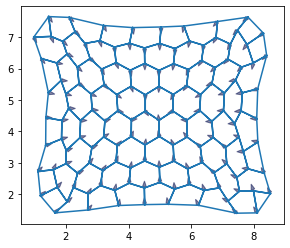

In [218]:
fig, ax = plot_forces(cellmap_H, geom_H, model_H, ['x', 'y'], 1)
print('area =')
print(cellmap_H.face_df["area"].mean())
print('face elasticity =')
print(cellmap_H.face_df["face_elasticity"].mean())
print('prefered length =')
print(cellmap_H.edge_df["prefered_length"].mean())

In [232]:
[cellmap_H, geom_H, model_H, history_H] = change_specs(cellmap_original, geom_original, model_original, history_original, face_elasticity = 0.05, prefered_area = 5, 
                                                        lower_length_elasticity = 900, higher_length_elasticity = 4800, line_nought = 1, endTime = 10)




area =
4.802664402397121
face elasticity =
0.049999999999999996
prefered length =
1.0


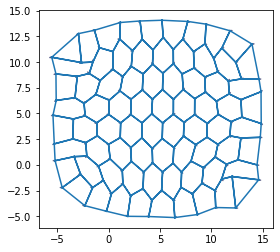

In [233]:
fig, ax = plot_forces(cellmap_H, geom_H, model_H, ['x', 'y'], 1)
print('area =')
print(cellmap_H.face_df["area"].mean())
print('face elasticity =')
print(cellmap_H.face_df["face_elasticity"].mean())
print('prefered length =')
print(cellmap_H.edge_df["prefered_length"].mean())

In [229]:
[cellmap_H, geom_H, model_H, history_H] = change_specs(cellmap_original, geom_original, model_original, history_original, face_elasticity = 0.05, prefered_area = 5, 
                                                        lower_length_elasticity = 900, higher_length_elasticity = 4800, line_nought = 1.4, endTime = 10)



area =
4.772503161585572
face elasticity =
0.049999999999999996
prefered length =
1.4000000000000001


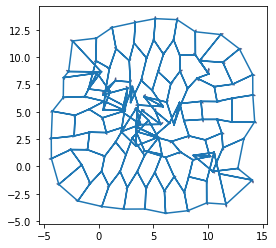

In [230]:
fig, ax = plot_forces(cellmap_H, geom_H, model_H, ['x', 'y'], 1)
print('area =')
print(cellmap_H.face_df["area"].mean())
print('face elasticity =')
print(cellmap_H.face_df["face_elasticity"].mean())
print('prefered length =')
print(cellmap_H.edge_df["prefered_length"].mean())